# Part 1: familiarise with data tools

## Reading data using pandas

[**Pandas:**](http://pandas.pydata.org/) popular Python library for data exploration, manipulation, and analysis

- Anaconda users: use the provided [environment.yml](environment.yml)
- Other users: [installation instructions](https://pandas.pydata.org/pandas-docs/stable/getting_started/install.html)

In [1]:
# conventional way to import pandas
import pandas as pd

In [2]:
# read CSV file from the 'data' subdirectory using a relative path
ads = pd.read_csv('data/Advertising.csv', index_col=0)

# display the first 5 rows
ads.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Primary object types:

- **DataFrame:** rows and columns (like a spreadsheet)
- **Series:** a single column

In [3]:
# display the last 5 rows
ads.tail()

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [4]:
# check the shape of the DataFrame (rows, columns)
ads.shape

(200, 4)

## Visualizing data using seaborn

[**Seaborn:**](http://seaborn.pydata.org/) Python library for statistical data visualization built on top of Matplotlib

- Anaconda users: use the provided [environment.yml](environment.yml)
- Other users: [installation instructions](http://seaborn.pydata.org/installing.html)

In [5]:
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

View relationship between features using [scatterplots](http://seaborn.pydata.org/generated/seaborn.pairplot.html). The `reg` option fits linear regression models to the scatter plots.

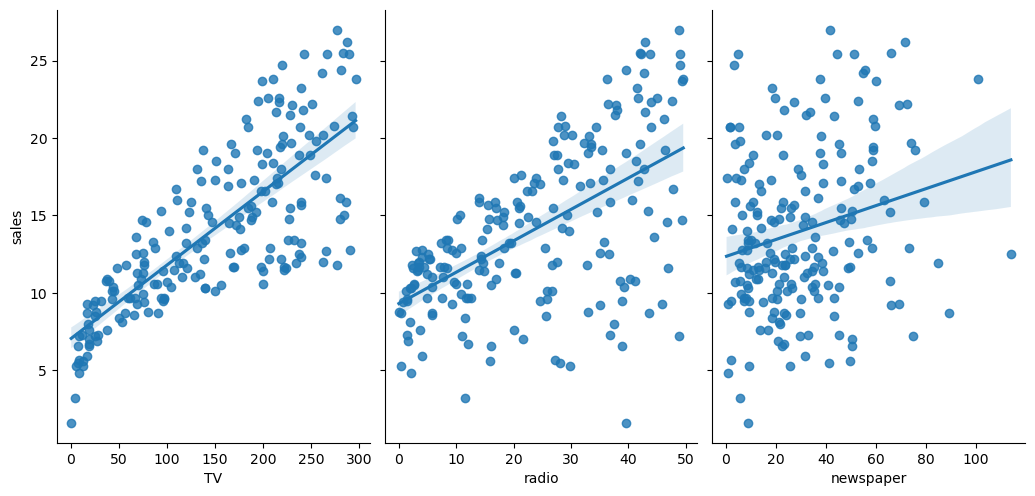

In [6]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(ads, x_vars=['TV','radio','newspaper'], y_vars=['sales'], height=5, aspect=0.7, kind='reg')

## Using Pandas to manage datasets

To explore pandas we will use the [Titanic dataset](https://www.kaggle.com/c/titanic), available in the folder `data/titanic`.

In [7]:
titanic = pd.read_csv("data/titanic/train.csv")

You can use `loc` and `iloc` methods to [select elements](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#different-choices-for-indexing) of `Serie`s or `DataFrame`s.

In [8]:
# select rows
titanic.loc[:10]  # Retrieve rows with labels from 0 to 10 ( Getting values on a DataFrame with an index that has integer labels )

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


#### About the data
Here's some of the columns
* Name - a string with person's full name
* Survived - 1 if a person survived the shipwreck, 0 otherwise.
* Pclass - passenger class.
* Sex - a person's gender (in those good ol' times when there were just 2 of them)
* Age - age in years, if available
* Sibsp - number of siblings on a ship
* Parch - number of parents on a ship
* Fare - ticket cost
* Embarked - port where the passenger embarked
 * C = Cherbourg; Q = Queenstown; S = Southampton

In [9]:
# table dimensions
print("len(titanic) = ", len(titanic))
print("titanic.shape = ", titanic.shape)

len(titanic) =  891
titanic.shape =  (891, 12)


In [10]:
# select a single column.
titanic["Age"].loc[:10] # alternatively: titanic.Age

0     22.0
1     38.0
2     26.0
3     35.0
4     35.0
5      NaN
6     54.0
7      2.0
8     27.0
9     14.0
10     4.0
Name: Age, dtype: float64

In [16]:
# select several columns and rows at once
titanic[["Fare","Pclass"]].loc[5:10]

,Fare,Pclass
5,8.4583,3
6,51.8625,1
7,21.0750,3
8,11.1333,3
9,30.0708,2
10,16.7000,3


In [20]:
# select passengers of rows 13 and 666 - did they survive?

# <YOUR CODE >
survived=titanic["Survived"]
print("13 titanic survived: ",survived[13])
print("666 titanic survived: ",survived[666])

13 titanic survived:  0
666 titanic survived:  0


Pandas provides different [aggregate functions](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#descriptive-statistics).

In [26]:
# compute the overall survival rate (what fraction of passengers survived the shipwreck)

# <YOUR CODE >
titanic["Survived"].sum()/len(titanic) 

0.3838383838383838

Pandas also has some basic data analysis tools. For one, you can quickly display statistical aggregates for each column using `.describe()`

In [23]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Some columns contain __NaN__ values - this means that there is no data there. For example, passenger `#5` has unknown age. To simplify the future data analysis, we'll replace NaN values by using pandas `fillna` function.

_Note: we do this so easily because it's a tutorial. In general, you think twice before you modify data like this._

In [27]:
titanic.iloc[5]

PassengerId                   6
Survived                      0
Pclass                        3
Name           Moran, Mr. James
Sex                        male
Age                         NaN
SibSp                         0
Parch                         0
Ticket                   330877
Fare                     8.4583
Cabin                       NaN
Embarked                      Q
Name: 5, dtype: object

In [28]:
titanic['Age'] = titanic['Age'].fillna(value=titanic['Age'].mean())
titanic['Fare'] = titanic['Fare'].fillna(value=titanic['Fare'].mean())

In [30]:
titanic.iloc[5]

PassengerId                   6
Survived                      0
Pclass                        3
Name           Moran, Mr. James
Sex                        male
Age                   29.699118
SibSp                         0
Parch                         0
Ticket                   330877
Fare                     8.4583
Cabin                       NaN
Embarked                      Q
Name: 5, dtype: object

Pandas provides different functions to modify the dataset, some examples are

In [31]:
# convert using `map`
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})
titanic[["Name","Sex"]].loc[:5]

,Name,Sex
0,"Braund, Mr. Owen Harris",0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1
2,"Heikkinen, Miss. Laina",1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1
4,"Allen, Mr. William Henry",0
5,"Moran, Mr. James",0


In [32]:
# cast a column
titanic['Age'] = titanic['Age'].astype(int)
titanic[['Name','Age']].loc[:5]

,Name,Age
0,"Braund, Mr. Owen Harris",22
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38
2,"Heikkinen, Miss. Laina",26
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35
4,"Allen, Mr. William Henry",35
5,"Moran, Mr. James",29


In [33]:
# Add a calculated column
titanic.loc[(titanic['Age'] >= 18), 'Underage'] = 0
titanic.loc[(titanic['Age'] < 18), 'Underage'] = 1
titanic[['Name','Age','Underage']].sample(10)

,Name,Age,Underage
828,"McCormack, Mr. Thomas Joseph",29,0.0
475,"Clifford, Mr. George Quincy",29,0.0
187,"Romaine, Mr. Charles Hallace (""Mr C Rolmane"")",45,0.0
745,"Crosby, Capt. Edward Gifford",70,0.0
750,"Wells, Miss. Joan",4,1.0
381,"Nakid, Miss. Maria (""Mary"")",1,1.0
153,"van Billiard, Mr. Austin Blyler",40,0.0
380,"Bidois, Miss. Rosalie",42,0.0
684,"Brown, Mr. Thomas William Solomon",60,0.0
298,"Saalfeld, Mr. Adolphe",29,0.0


Numerical data can be [discretised](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html?highlight=qcut#discretization-and-quantiling).

In [34]:
# Discretise numerical data using quantiles
titanic['Fare_category'] = pd.qcut(titanic['Fare'], 5, labels=range(5))
titanic[['Name','Fare','Fare_category']].sample(10)

,Name,Fare,Fare_category
487,"Kent, Mr. Edward Austin",29.7000,3
825,"Flynn, Mr. John",6.9500,0
310,"Hays, Miss. Margaret Bechstein",83.1583,4
188,"Bourke, Mr. John",15.5000,2
200,"Vande Walle, Mr. Nestor Cyriel",9.5000,1
185,"Rood, Mr. Hugh Roscoe",50.0000,4
484,"Bishop, Mr. Dickinson H",91.0792,4
374,"Palsson, Miss. Stina Viola",21.0750,2
175,"Klasen, Mr. Klas Albin",7.8542,0
446,"Mellinger, Miss. Madeleine Violet",19.5000,2


In [35]:
# removing columns
X_train = titanic.drop('Survived', axis=1)
y_train = titanic['Survived']
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   PassengerId    891 non-null    int64   
 1   Pclass         891 non-null    int64   
 2   Name           891 non-null    object  
 3   Sex            891 non-null    int64   
 4   Age            891 non-null    int32   
 5   SibSp          891 non-null    int64   
 6   Parch          891 non-null    int64   
 7   Ticket         891 non-null    object  
 8   Fare           891 non-null    float64 
 9   Cabin          204 non-null    object  
 10  Embarked       889 non-null    object  
 11  Underage       891 non-null    float64 
 12  Fare_category  891 non-null    category
dtypes: category(1), float64(2), int32(1), int64(5), object(4)
memory usage: 81.2+ KB


In [36]:
# drop doesn't modify the original dataset
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   PassengerId    891 non-null    int64   
 1   Survived       891 non-null    int64   
 2   Pclass         891 non-null    int64   
 3   Name           891 non-null    object  
 4   Sex            891 non-null    int64   
 5   Age            891 non-null    int32   
 6   SibSp          891 non-null    int64   
 7   Parch          891 non-null    int64   
 8   Ticket         891 non-null    object  
 9   Fare           891 non-null    float64 
 10  Cabin          204 non-null    object  
 11  Embarked       889 non-null    object  
 12  Underage       891 non-null    float64 
 13  Fare_category  891 non-null    category
dtypes: category(1), float64(2), int32(1), int64(6), object(4)
memory usage: 88.1+ KB


In [37]:
# create new datasets from existing ones and/or series
some_values = pd.concat([titanic[['Name', 'Underage']], y_train], axis=1).sample(10)
some_values

,Name,Underage,Survived
323,"Caldwell, Mrs. Albert Francis (Sylvia Mae Harb...",0.0,1
816,"Heininen, Miss. Wendla Maria",0.0,0
316,"Kantor, Mrs. Sinai (Miriam Sternin)",0.0,1
555,"Wright, Mr. George",0.0,0
77,"Moutal, Mr. Rahamin Haim",0.0,0
705,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",0.0,0
313,"Hendekovic, Mr. Ignjac",0.0,0
632,"Stahelin-Maeglin, Dr. Max",0.0,1
774,"Hocking, Mrs. Elizabeth (Eliza Needs)",0.0,1
692,"Lam, Mr. Ali",0.0,1


In [ ]:
# convert to CSV
print(some_values.to_csv(index=False))

More pandas: 
* Official [tutorials](https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html), including this [10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)
* Bunch of cheat sheets awaits just one google query away from you (e.g. [basics](https://www.datacamp.com/community/blog/python-pandas-cheat-sheet), [combining datasets](https://pbs.twimg.com/media/C65MaMpVwAA3v0A.jpg) and so on). 

## Numpy and vectorized computing

Almost any machine learning model requires some computational heavy lifting usually involving linear algebra problems. Unfortunately, raw python is terrible at this because each operation is interpreted at runtime. 

So instead, we'll use [**numpy**](https://docs.scipy.org/doc/numpy/user/quickstart.html) - a library that lets you run blazing fast computation with vectors, matrices and other tensors. Again, the god object here is `numpy.ndarray`:

In [38]:
import numpy as np

a = np.array([1, 2, 3, 4, 5])
b = np.array([5, 4, 3, 2, 1])
print("a = ", a)
print("b = ", b)

# math and boolean operations can applied to each element of an array
print("a + 1 =", a + 1)
print("a * 2 =", a * 2)
print("a == 2", a == 2)
# ... or corresponding elements of two (or more) arrays
print("a + b =", a + b)
print("a * b =", a * b)

a =  [1 2 3 4 5]
b =  [5 4 3 2 1]
a + 1 = [2 3 4 5 6]
a * 2 = [ 2  4  6  8 10]
a == 2 [False  True False False False]
a + b = [6 6 6 6 6]
a * b = [5 8 9 8 5]


In [40]:
# Your turn: compute half-products of a and b elements (halves of products)

# <YOUR CODE >
print("Halves of products:",(a*b)/2)

Halves of products: [2.5 4.  4.5 4.  2.5]


In [42]:
# compute elementwise quotient between squared a and (b plus 1)
# <YOUR CODE >
print("Elementwise quotient between squared a and (b plus 1):", a**2/(b+1))

Elementwise quotient between squared a and (b plus 1): [ 0.16666667  0.8         2.25        5.33333333 12.5       ]


There's also a bunch of pre-implemented operations including logarithms, trigonometry, vector/matrix products and aggregations.

In [43]:
a = np.array([1, 2, 3, 4, 5])
b = np.array([5, 4, 3, 2, 1])
print("numpy.sum(a) = ", np.sum(a))
print("numpy.mean(a) = ", np.mean(a))
print("numpy.min(a) = ",  np.min(a))
print("numpy.argmin(b) = ", np.argmin(b))  # index of minimal element
# dot product. Also used for matrix/tensor multiplication
print("numpy.dot(a,b) = ", np.dot(a, b))
print("numpy.unique(['male','male','female','female','male']) = ", np.unique(
    ['male', 'male', 'female', 'female', 'male']))

# and tons of other stuff. see http://bit.ly/2u5q430 .

numpy.sum(a) =  15
numpy.mean(a) =  3.0
numpy.min(a) =  1
numpy.argmin(b) =  4
numpy.dot(a,b) =  35
numpy.unique(['male','male','female','female','male']) =  ['female' 'male']


The important part: all this functionality works with dataframes:

In [44]:
print("Max ticket price: ", np.max(titanic["Fare"]))
# print("\nThe guy who paid the most:\n", titanic.loc[np.argmax(titanic["Fare"])])
print("\nThe guy who paid the most:\n", titanic.loc[titanic["Fare"].idxmax()])

Max ticket price:  512.3292

The guy who paid the most:
 PassengerId                   259
Survived                        1
Pclass                          1
Name             Ward, Miss. Anna
Sex                             1
Age                            35
SibSp                           0
Parch                           0
Ticket                   PC 17755
Fare                     512.3292
Cabin                         NaN
Embarked                        C
Underage                      0.0
Fare_category                   4
Name: 258, dtype: object


In [60]:
# your code: compute mean passenger age and the oldest guy on the ship

# <YOUR CODE >
print("Mean passenger age: ",titanic["Age"].mean()) 
print("Oldest guy: ", titanic.loc[titanic[titanic["Sex"]==0]["Age"].idxmax()])

Mean passenger age:  29.544332210998878
Oldest guy:  PassengerId                                       631
Survived                                            1
Pclass                                              1
Name             Barkworth, Mr. Algernon Henry Wilson
Sex                                                 0
Age                                                80
SibSp                                               0
Parch                                               0
Ticket                                          27042
Fare                                             30.0
Cabin                                             A23
Embarked                                            S
Underage                                          0.0
Fare_category                                       3
Name: 630, dtype: object


In [58]:
print("Boolean operations")

print('a = ', a)
print('b = ', b)
print("a > 2", a > 2)
print("numpy.logical_not(a>2) = ", np.logical_not(a > 2))
print("numpy.logical_and(a>2,b>2) = ", np.logical_and(a > 2, b > 2))
print("numpy.logical_or(a>4,b<3) = ", np.logical_or(a > 2, b < 3))

print("\n shortcuts")
print("~(a > 2) = ", ~(a > 2))  # logical_not(a > 2)
print("(a > 2) & (b > 2) = ", (a > 2) & (b > 2))  # logical_and
print("(a > 2) | (b < 3) = ", (a > 2) | (b < 3))  # logical_or

Boolean operations
a =  [1 2 3 4 5]
b =  [5 4 3 2 1]
a > 2 [False False  True  True  True]
numpy.logical_not(a>2) =  [ True  True False False False]
numpy.logical_and(a>2,b>2) =  [False False  True False False]
numpy.logical_or(a>4,b<3) =  [False False  True  True  True]

 shortcuts
~(a > 2) =  [ True  True False False False]
(a > 2) & (b > 2) =  [False False  True False False]
(a > 2) | (b < 3) =  [False False  True  True  True]


The final numpy feature we'll need is indexing: selecting elements from an array. 
Aside from python indexes and slices (e.g. a[1:4]), numpy also allows you to select several elements at once.

In [59]:
a = np.array([0, 1, 4, 9, 16, 25])
ix = np.array([1, 2, 5])
print("a = ", a)
print("Select by element index")
print("a[[1,2,5]] = ", a[ix])

print("\nSelect by boolean mask")
# select all elementts in a that are greater than 5
print("a[a > 5] = ", a[a > 5])
print("(a % 2 == 0) =", a % 2 == 0)  # True for even, False for odd
print("a[a > 3] =", a[a % 2 == 0])  # select all elements in a that are even


# select male children
print("titanic[(titanic['Age'] < 18) & (titanic['Sex'] == 0)] = (below)")
titanic[(titanic['Age'] < 18) & (titanic['Sex'] == 0)]

a =  [ 0  1  4  9 16 25]
Select by element index
a[[1,2,5]] =  [ 1  4 25]

Select by boolean mask
a[a > 5] =  [ 9 16 25]
(a % 2 == 0) = [ True False  True False  True False]
a[a > 3] = [ 0  4 16]
titanic[(titanic['Age'] < 18) & (titanic['Sex'] == 0)] = (below)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Underage,Fare_category
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2,3,1,349909,21.0750,NaN,S,1.0,2
16,17,0,3,"Rice, Master. Eugene",0,2,4,1,382652,29.1250,NaN,Q,1.0,3
50,51,0,3,"Panula, Master. Juha Niilo",0,7,4,1,3101295,39.6875,NaN,S,1.0,3
59,60,0,3,"Goodwin, Master. William Frederick",0,11,5,2,CA 2144,46.9000,NaN,S,1.0,4
63,64,0,3,"Skoog, Master. Harald",0,4,3,2,347088,27.9000,NaN,S,1.0,3
78,79,1,2,"Caldwell, Master. Alden Gates",0,0,0,2,248738,29.0000,NaN,S,1.0,3
86,87,0,3,"Ford, Mr. William Neal",0,16,1,3,W./C. 6608,34.3750,NaN,S,1.0,3
125,126,1,3,"Nicola-Yarred, Master. Elias",0,12,1,0,2651,11.2417,NaN,C,1.0,2
138,139,0,3,"Osen, Mr. Olaf Elon",0,16,0,0,7534,9.2167,NaN,S,1.0,1
163,164,0,3,"Calic, Mr. Jovo",0,17,0,0,315093,8.6625,NaN,S,1.0,1


### Your turn

Use numpy and pandas to answer a few questions about data

In [76]:
# who on average paid more for their ticket, men or women?

mean_fare_men = titanic[titanic["Sex"]==0]["Age"].mean()
mean_fare_women = titanic[titanic["Sex"]==1]["Age"].mean()

print('Average fare: men={}, women={}'.format(mean_fare_men, mean_fare_women))

Average fare: men=30.336221837088388, women=28.089171974522294


In [89]:
# who is more likely to survive: a child (<18 yo) or an adult?

child_survival_rate = titanic[(titanic["Age"]<18) & (titanic["Survived"]==1)].shape[0]/titanic[titanic["Age"]<18].shape[0]
adult_survival_rate = titanic[(titanic["Age"]>=18) & (titanic["Survived"]==1)].shape[0]/titanic[titanic["Age"]>=18].shape[0]

print('Survival rate: underage={}, adults={}'.format(child_survival_rate, adult_survival_rate))

Survival rate: underage=0.5398230088495575, adults=0.36118251928020567
